# c1: load data

In [1]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/datasethub/ds105/master/EDA_automobile.csv'
df = pd.read_csv(url)
df.head()

symboling  normalized-losses         make  ... horsepower-binned diesel gas
0          3                122  alfa-romero  ...            Medium      0   1
1          3                122  alfa-romero  ...            Medium      0   1
2          1                122  alfa-romero  ...            Medium      0   1
3          2                164         audi  ...            Medium      0   1
4          2                164         audi  ...            Medium      0   1

[5 rows x 29 columns]

In [2]:
df.shape

(201, 29)

# c2: kiem tra du lieu co bi khuyet hay khong

In [3]:
df.isnull().sum().sum()

0

# Cau3: tinh correlation cua cac feature = ['bore', 'stroke', 'compression-ratio', 'horsepower']. nx xem co mqh tuong quan nao k?

In [4]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr(method = 'pearson')

bore    stroke  compression-ratio  horsepower
bore               1.000000 -0.055389           0.001263    0.566936
stroke            -0.055389  1.000000           0.187906    0.098237
compression-ratio  0.001263  0.187906           1.000000   -0.214514
horsepower         0.566936  0.098237          -0.214514    1.000000

co mqh giua bore voi horsepower vi correlation = 0.56666

# cau4: phat hoa scatterplot cua engine-size va price 
---scatterplot la bieu do phan tan

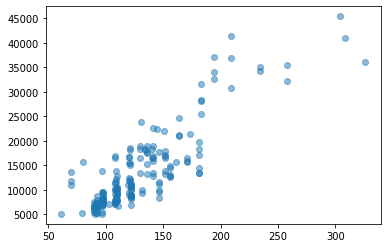

In [6]:
import matplotlib.pyplot as plt

x = df['engine-size']
y = df['price']

plt.scatter(x,y,alpha=0.5)
plt.show()

# c5: xet toan data, tim cac featue(kieuso) co correlation so voi price co anh huong nhieu nhat( dong thuan, khong dong thuan)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [11]:
# chi lay thuoc tinh kieu so
df_5= df.select_dtypes(exclude='object')
# tinh do tuong quan correlation
df_5.corr()['price']

symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543155
stroke               0.082274
compression-ratio    0.071107
horsepower           0.809575
peak-rpm            -0.101616
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
city-L/100km         0.789898
diesel               0.110326
gas                 -0.110326
Name: price, dtype: float64

co anh huong khi correlation >=|0.3|

In [12]:
df_5 = df[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower', 'city-mpg', 'highway-mpg', 'city-L/100km','price']]

#Câu 6: Dùng seaborn để phát họa các regplot cho các feature đã tìm thấy

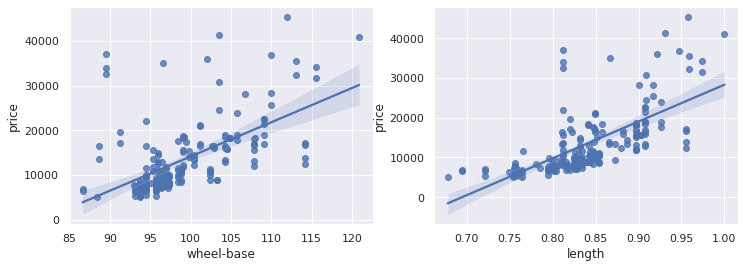

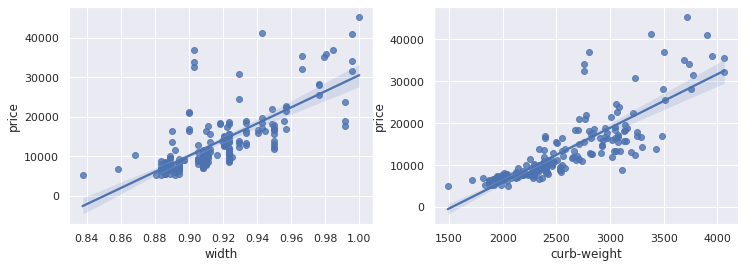

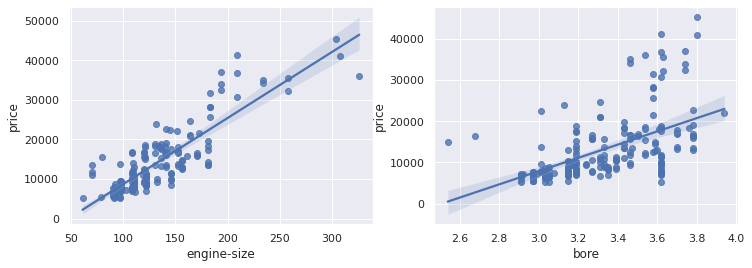

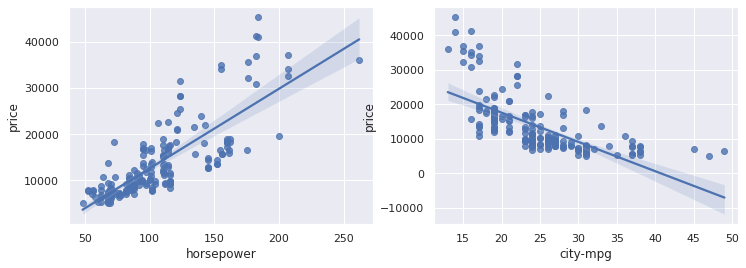

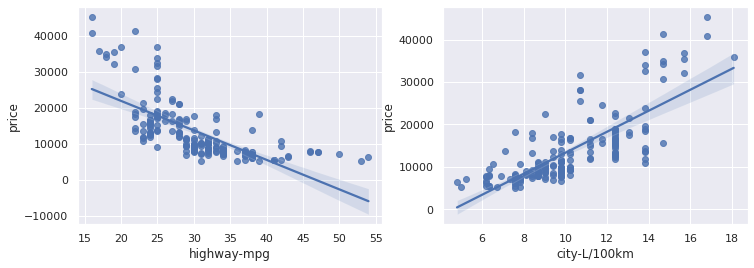

In [13]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(12,4)})
fig, (axs) = plt.subplots(nrows = 1,ncols = 2)
sns.regplot(x='wheel-base', y='price', data=df_5, ax=axs[0])
sns.regplot(x='length', y='price', data=df_5, ax=axs[1])
fig, (axs1) = plt.subplots(nrows = 1,ncols = 2)
sns.regplot(x='width',y='price', data=df_5, ax=axs1[0])
sns.regplot(x='curb-weight',y='price', data=df_5, ax=axs1[1])
fig, (axs2) = plt.subplots(nrows = 1,ncols = 2)
sns.regplot(x='engine-size',y='price', data=df_5, ax=axs2[0])
sns.regplot(x='bore',y='price', data=df_5, ax=axs2[1])
fig, (axs3) = plt.subplots(nrows = 1,ncols = 2)
sns.regplot(x='horsepower',y='price', data=df_5, ax=axs3[0])
sns.regplot(x='city-mpg',y='price', data=df_5, ax=axs3[1])
fig, (axs4) = plt.subplots(nrows = 1,ncols = 2)
sns.regplot(x='highway-mpg',y='price', data=df_5, ax=axs4[0])
sns.regplot(x='city-L/100km',y='price', data=df_5, ax=axs4[1])
plt.show()

#Câu 7: Biến 'body-style' là loại biến gì? Nếu là category thì đếm số lượng cho mỗi value. Kết quả về là một df với index là các value

In [16]:
df['body-style'].dtypes

dtype('O')

In [17]:
df['body-style'].value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

#c8: Phát họa các boxplot biểu diễn 'body-style' theo price

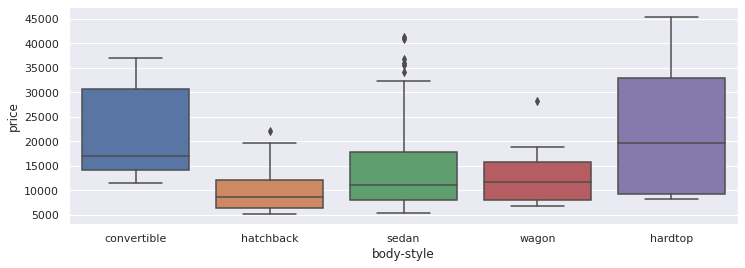

In [20]:
import seaborn as sns

sns.boxplot(x='body-style', y='price', data=df)

# C9: trích lọc các sample nằm trong miền biến thiên về giá theo các giá trị trong 'body-style'

##IQR = Q3-Q1 (độ trải dữ liệu)
##upper fence = Q3+1.5*IQR
##lower fence = Q3-1.5*IQR

In [31]:
df_9=df[['body-style','price']]
arr=[]
for i in df_9['body-style'].unique():
    df_9_temp=df_9[df_9.iloc[:,0]==i]
    q1=np.quantile(df_9.iloc[:,1],0.25)
    q3=np.quantile(df_9.iloc[:,1],0.75)
    iqr=q3-q1
    uppper_bound=q3+(1.5*iqr)
    lower_bound=q1-(1.5*iqr)
    for j in range(len(df.index)):
        if (df['price'][j]<=uppper_bound and df['price'][j] >=lower_bound and df['body-style'][j]==i):
            arr.append(j)
arr.sort()

In [32]:
df.iloc[arr,:]

symboling  normalized-losses         make  ... horsepower-binned diesel gas
0            3                122  alfa-romero  ...            Medium      0   1
1            3                122  alfa-romero  ...            Medium      0   1
2            1                122  alfa-romero  ...            Medium      0   1
3            2                164         audi  ...            Medium      0   1
4            2                164         audi  ...            Medium      0   1
..         ...                ...          ...  ...               ...    ...  ..
196         -1                 95        volvo  ...            Medium      0   1
197         -1                 95        volvo  ...              High      0   1
198         -1                 95        volvo  ...            Medium      0   1
199         -1                 95        volvo  ...            Medium      1   0
200         -1                 95        volvo  ...            Medium      0   1

[187 rows x 29 columns]

#Câu10: Căn cứ vào giá xe, chúng ta có thể nhận xét gì về các nhóm giá trị trong'engine-location'

In [33]:
df['engine-location'].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

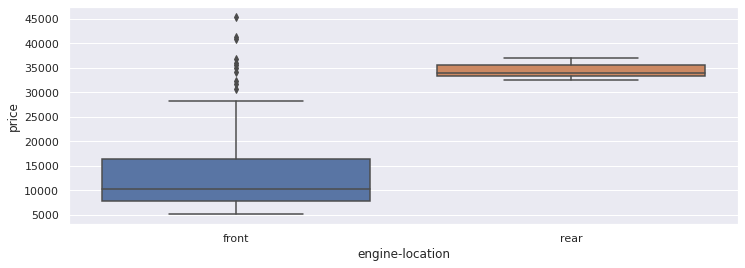

In [34]:
# ve boxplot 
sns.boxplot(x='engine-location', y = 'price', data=df)

In [35]:
df_c10_front = df[(df['engine-location']=='front')]
df_c10_rear = df[(df['engine-location'] == 'rear')]

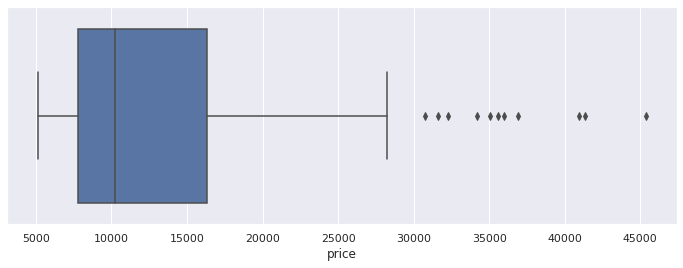

In [37]:
sns.boxplot(x=df_c10_front['price'])

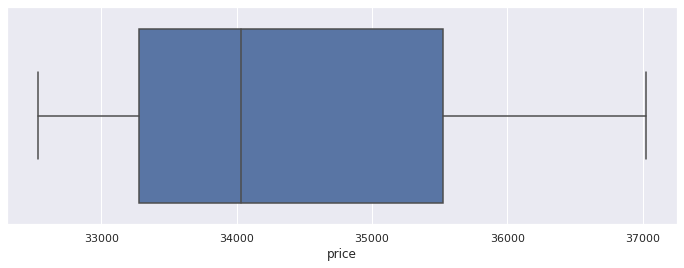

In [38]:
sns.boxplot(x=df_c10_rear['price'])

- giá xe front chỉ ở mức trung bình từ 7000-10000
- rear giá xe cao hơn từ 3300 - 36000

## câu 11: Tạo groupby các feature = ['drive-wheels', 'body-style'] theo trung bình giá

In [41]:
df_c11 = df.groupby(['drive-wheels', 'body-style'], as_index=False).mean()

In [43]:
df_c11

drive-wheels   body-style  symboling  ...  city-L/100km    diesel       gas
0           4wd    hatchback   2.000000  ...      9.038462  0.000000  1.000000
1           4wd        sedan   0.666667  ...     10.879630  0.000000  1.000000
2           4wd        wagon   0.000000  ...      9.460548  0.000000  1.000000
3           fwd  convertible   3.000000  ...      9.791667  0.000000  1.000000
4           fwd      hardtop   2.000000  ...      7.580645  0.000000  1.000000
5           fwd    hatchback   1.367347  ...      8.524647  0.020408  0.979592
6           fwd        sedan   0.709091  ...      8.787002  0.145455  0.854545
7           fwd        wagon   0.083333  ...      9.480067  0.000000  1.000000
8           rwd  convertible   2.800000  ...     12.136730  0.000000  1.000000
9           rwd      hardtop   1.857143  ...     12.069942  0.142857  0.857143
10          rwd    hatchback   2.277778  ...     11.934860  0.000000  1.000000
11          rwd        sedan  -0.277778  ...     11.852983  0.194444  0.805556
12          rwd        wagon  -0.555556  ...     11.157741  0.333333  0.666667

[13 rows x 21 columns]

In [44]:
df_grb = df_c11[['drive-wheels','body-style','price']]
df_grb.head()

drive-wheels   body-style         price
0          4wd    hatchback   7603.000000
1          4wd        sedan  12647.333333
2          4wd        wagon   9095.750000
3          fwd  convertible  11595.000000
4          fwd      hardtop   8249.000000

#Câu 12: tạo bảng pivot thể hiện trung bình giá, với index dòng là'drive-wheels', index cột là 'body-style'

In [46]:
df_pivot = df_grb.pivot(index = 'drive-wheels', columns='body-style')
df_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

# Cau 13: tao heatmap the hien cau 12 (dung cmap = 'Rdbu')

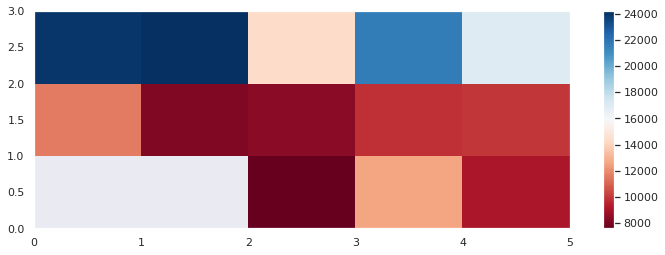

In [47]:
import matplotlib.pyplot as plt

plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

#Câu 14: Tính pearson_correlation, P-value giữa 'wheel-base' và 'price' đưa ra nhận xet

In [48]:
from scipy import stats

pearson_coef_whe,p_value_whe=stats.pearsonr(df['wheel-base'], df['price'])
print("Pearson Correlation: ",pearson_coef_whe,"with a P-value: ",p_value_whe)

Pearson Correlation:  0.584641822265508 with a P-value:  8.076488270733218e-20


Pearson Correlation > abs(0.3) pvalue<0.1

#Câu 15: Tính pearson_correlation, P-value giữa 'length' và 'price' đưa ra nhận xet

In [49]:

pearson_coef_len,p_value_len=stats.pearsonr(df['length'], df['price'])
print("Pearson Correlation : ",pearson_coef_len,"with a P-value: ",p_value_len)

Pearson Correlation :  0.6906283810037585 with a P-value:  8.01647628992934e-30


#Câu 16: Những feature có ảnh hưởng tới giá xe.

In [50]:
# Hàm kiểm tra pearson correlation và p_value có ảnh hưởng tới "price" không :
# nếu pearson > abs(0.3) và đồng thời p_value<0.1 thì attrubite đó ảnh hưởng tới giá xe và ngược lại
def check_correlation(x,y):
  if x>abs(0.3) and y<0.1:
    print ("Có ảnh hưởng tới giá xe -> chọn")
  else:
    print("Không ảnh hưởng tới giá xe")

In [51]:
# tính hệ số tương quan pearson_ và độ chắc chắn p_value sau đó kiểm tra có ảnh hưởng tới giá xe không rồi xuất ra

pearson_coef_sym,p_value_sym=stats.pearsonr(df['symboling'], df['price'])
print("'symboling'",check_correlation(pearson_coef_sym,p_value_sym))

pearson_nor,p_value_nor=stats.pearsonr(df['normalized-losses'], df['price'])
print("'normalized-losses'",check_correlation(pearson_nor,p_value_nor))

pearson_wi,p_value_wi=stats.pearsonr(df['width'], df['price'])
print("'width'", check_correlation(pearson_wi,p_value_wi))

pearson_hei,p_value_hei=stats.pearsonr(df['height'], df['price'])
print("'height'", check_correlation(p_value_hei, p_value_hei))

pearson_cu,p_value_cu=stats.pearsonr(df['curb-weight'], df['price'])
print("'curb-weight'", check_correlation(pearson_cu,p_value_cu))

pearson_en_size,p_value_en_size=stats.pearsonr(df['engine-size'], df['price'])
print("'engine-size'", check_correlation(pearson_en_size,p_value_en_size))

pearson_bore,p_value_bore=stats.pearsonr(df['bore'], df['price'])
print("'bore'", check_correlation(pearson_bore,p_value_bore))

pearson_stroke,p_value_stroke=stats.pearsonr(df['stroke'], df['price'])
print("'stroke' ", check_correlation(pearson_stroke, p_value_stroke))

pearson_com,p_value_com=stats.pearsonr(df['compression-ratio'], df['price'])
print("'compression-ratio'", check_correlation(pearson_com,p_value_com))

pearson_horse,p_value_horse=stats.pearsonr(df['horsepower'], df['price'])
print("'horsepower'", check_correlation(pearson_horse, p_value_horse))

pearson_peak,p_value_peak=stats.pearsonr(df['peak-rpm'], df['price'])
print("'peak-rpm'", check_correlation(pearson_peak,p_value_peak))

pearson_city_m,p_value_city_m=stats.pearsonr(df['city-mpg'], df['price'])
print("'city-mpg'", check_correlation(pearson_city_m, p_value_city_m))

pearson_city_L,p_value_city_L=stats.pearsonr(df['city-L/100km'], df['price'])
print("'city-L/100km' ", check_correlation(pearson_city_L, p_value_city_L))




Không ảnh hưởng tới giá xe
'symboling' None
Không ảnh hưởng tới giá xe
'normalized-losses' None
Có ảnh hưởng tới giá xe -> chọn
'width' None
Không ảnh hưởng tới giá xe
'height' None
Có ảnh hưởng tới giá xe -> chọn
'curb-weight' None
Có ảnh hưởng tới giá xe -> chọn
'engine-size' None
Có ảnh hưởng tới giá xe -> chọn
'bore' None
Không ảnh hưởng tới giá xe
'stroke'  None
Không ảnh hưởng tới giá xe
'compression-ratio' None
Có ảnh hưởng tới giá xe -> chọn
'horsepower' None
Không ảnh hưởng tới giá xe
'peak-rpm' None
Không ảnh hưởng tới giá xe
'city-mpg' None
Có ảnh hưởng tới giá xe -> chọn
'city-L/100km'  None
